# Trajectories on the Bloch Sphere

First, we are going to import the libraries and define the differential equations, including the detuning and damping parameters.

In [ ]:
#pip install -U nbconvert

In [ ]:
#Import libraries
import matplotlib.pyplot as plt 
import numpy as np
from qutip import *
from numpy import loadtxt
from matplotlib.font_manager import FontProperties
from pylab import figure, savefig

In [3]:
def optical_bloch(sigma, t, p):
    """
    Defines the differential equations for the optical Bloch equations including detuning and damping.

    Arguments:
        sigma :  vector of the state variables:
                  sigma = [sigmax, sigmay,sigmaz]
        t :  time
        p :  vector of the parameters:
                  p = [om,delt,rel,dec]
                    := [omega,delta,relaxation,decoherence]
    """
    sigmax, sigmay,sigmaz = sigma
    [om,delt,rel,dec] = p

    # Create f = (sigmax', sigmay',sigmaz'):
    f = [delt*sigmay-dec*sigmax,
         -1*delt*sigmax-om*sigmaz-dec*sigmay,
        om*sigmay-rel*(sigmaz-1)]
    return f

## Case 1: Optical Bloch equations without detuning or damping:

### a) Atom initially in the ground state

First, we are going to solve numerically the optical Bloch equations:

In [4]:
# Use ODEINT to solve the differential equations defined by the optical Bloch equations
from scipy.integrate import odeint

# Parameter values
# Rabi frequency:
om1=1
# Detuning
delt1=0
# Transverse decay rate
dec1 = 0
# Longitudinal decay rate
rel1=0

# Initial conditions
sigmax1=0
sigmay1=0
sigmaz1=-1

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 100

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [om1,delt1,rel1,dec1]
sigma0 = [sigmax1, sigmay1,sigmaz1]

# Call the ODE solver.
bloch_sol = odeint(optical_bloch, sigma0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('rabi_flopping.dat', 'w') as f:
    # Print & save the solution.
    for t1, sigma1 in zip(t, bloch_sol):
        print(t1, sigma1[0], sigma1[1], sigma1[2],file=f);

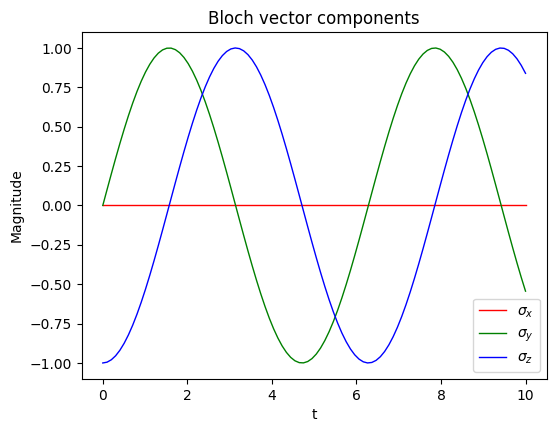

<Figure size 640x480 with 0 Axes>

In [5]:
# Plot the solution that was generated
t, sigmax, sigmay,sigmaz = loadtxt('rabi_flopping.dat', unpack=True)

figure(1, figsize=(6, 4.5))

# Plotting the curves simultaneously 
lw = 1
plt.plot(t, sigmax, color='r', label=r'$\sigma_x$', linewidth=lw) 
plt.plot(t, sigmay, color='g', label=r'$\sigma_y$', linewidth=lw) 
plt.plot(t, sigmaz, color='b', label=r'$\sigma_z$', linewidth=lw) 

# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("t") 
plt.ylabel("Magnitude") 
plt.title("Bloch vector components") 


# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
  
# To load the display window 
plt.show()

plt.savefig('rabi_flopping_components.png', dpi=100)

#### Representation of the solutions in the Bloch sphere:

##### Notice that the south pole state corresponds to the ground state, and we are going to consider that the atom is initially unexcited.

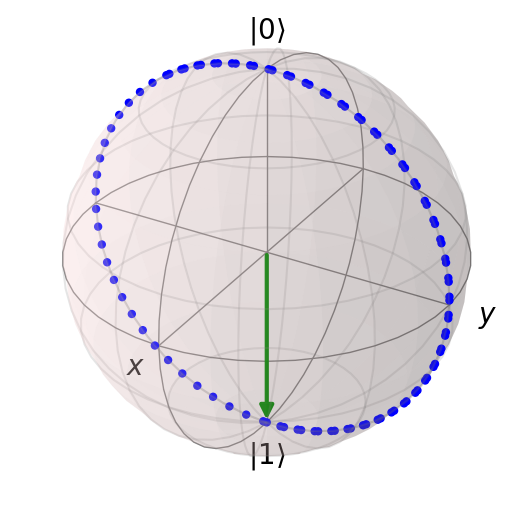

In [6]:
b = Bloch()
b.make_sphere()
#We are going to add the vector that represents the initial state and the points that correspond to the evolution
vec=[0,0,-1]
b.add_vectors(vec) #Initial state
pnts = [sigmax, sigmay,sigmaz]
b.add_points(pnts)
b.render()
b.show()

### b) Atom initially in a superposition state: $ \sigma_x=1/\sqrt{2}, \sigma_y=1/\sqrt{2},\sigma_z=0 $

In [7]:
# Use ODEINT to solve the differential equations defined by the optical Bloch equations
from scipy.integrate import odeint

# Parameter values
# Rabi frequency:
om2=1
# Detuning
delt2=0
# Transverse decay rate
dec2 = 0
# Longitudinal decay rate
rel2=0

# Initial conditions:  superposition state
sigmax2=1/np.sqrt(2)
sigmay2=1/np.sqrt(2)
sigmaz2=0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 100

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p2 = [om2,delt2,rel2,dec2]
sigma02 = [sigmax2, sigmay2,sigmaz2]

# Call the ODE solver.
bloch_sol2 = odeint(optical_bloch, sigma02, t, args=(p2,),
              atol=abserr, rtol=relerr)

with open('rabi_flopping_superposition.dat', 'w') as f2:
    # Print & save the solution.
    for t1, sigma2 in zip(t, bloch_sol2):
        print(t1, sigma2[0], sigma2[1], sigma2[2],file=f2);

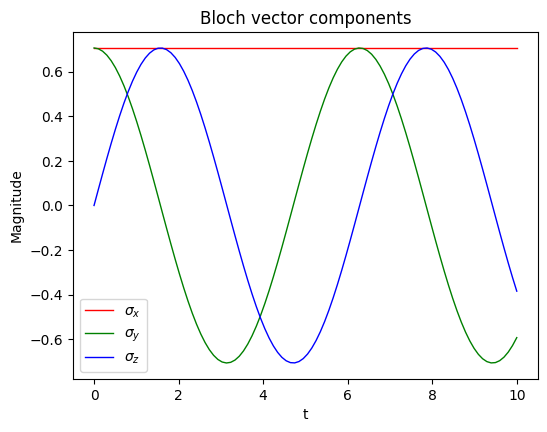

<Figure size 640x480 with 0 Axes>

In [8]:
# Plot the solution that was generated
t, sigmax, sigmay,sigmaz = loadtxt('rabi_flopping_superposition.dat', unpack=True)

figure(1, figsize=(6, 4.5))

# Plotting the curves simultaneously 
lw = 1
plt.plot(t, sigmax, color='r', label=r'$\sigma_x$', linewidth=lw) 
plt.plot(t, sigmay, color='g', label=r'$\sigma_y$', linewidth=lw) 
plt.plot(t, sigmaz, color='b', label=r'$\sigma_z$', linewidth=lw) 

# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("t") 
plt.ylabel("Magnitude") 
plt.title("Bloch vector components") 


# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
  
# To load the display window 
plt.show()

plt.savefig('rabi_flopping_superposition_components.png', dpi=100)

#### Representation of the solutions in the Bloch sphere:

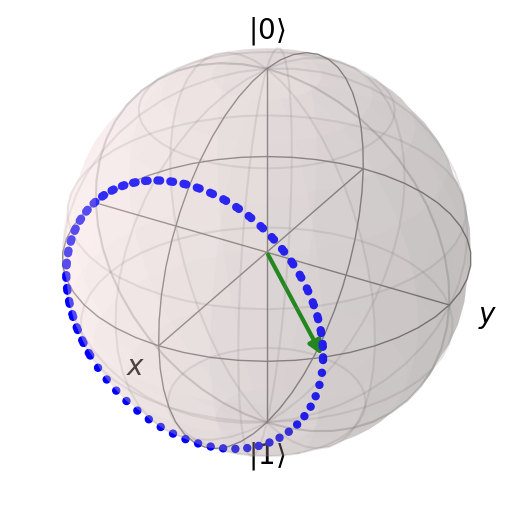

In [9]:
b2 = Bloch()
b2.make_sphere()
#We are going to add the vector that represents the initial state and the points that correspond to the evolution
b2.add_vectors(sigma02) #Initial state
pnts = [sigmax, sigmay,sigmaz]
b2.add_points(pnts)
b2.render()
b2.show()

## Case 2: Effect of the detuning:

### a) Atom initially in the ground state:

In [10]:
# Use ODEINT to solve the differential equations defined by the optical Bloch equations
from scipy.integrate import odeint

# Parameter values
# Rabi frequency:
om3=1
# Detuning
delt3=0.5
# Transverse decay rate
dec3 = 0
# Longitudinal decay rate
rel3=0

# Initial conditions
sigmax3=0
sigmay3=0
sigmaz3=-1

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 100

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p3 = [om3,delt3,rel3,dec3]
sigma03 = [sigmax3, sigmay3,sigmaz3]

# Call the ODE solver.
bloch_sol3 = odeint(optical_bloch, sigma03, t, args=(p3,),
              atol=abserr, rtol=relerr)

with open('detunning_effect.dat', 'w') as f3:
    # Print & save the solution.
    for t1, sigma3 in zip(t, bloch_sol3):
        print(t1, sigma3[0], sigma3[1], sigma3[2],file=f3);

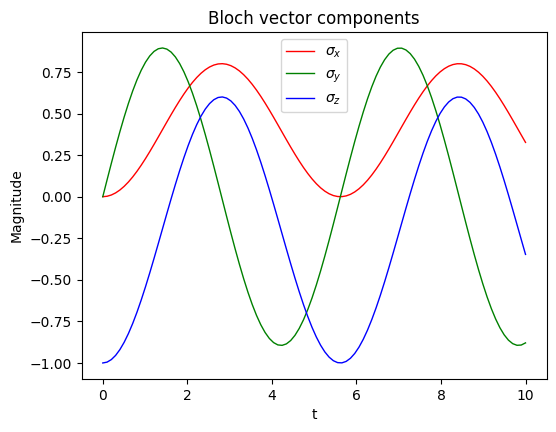

<Figure size 640x480 with 0 Axes>

In [11]:
# Plot the solution that was generated
t, sigmax, sigmay,sigmaz = loadtxt('detunning_effect.dat', unpack=True)

figure(1, figsize=(6, 4.5))

# Plotting the curves simultaneously 
lw = 1
plt.plot(t, sigmax, color='r', label=r'$\sigma_x$', linewidth=lw) 
plt.plot(t, sigmay, color='g', label=r'$\sigma_y$', linewidth=lw) 
plt.plot(t, sigmaz, color='b', label=r'$\sigma_z$', linewidth=lw) 

# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("t") 
plt.ylabel("Magnitude") 
plt.title("Bloch vector components") 


# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
  
# To load the display window 
plt.show()

plt.savefig('detunning_effect_components.png', dpi=100)

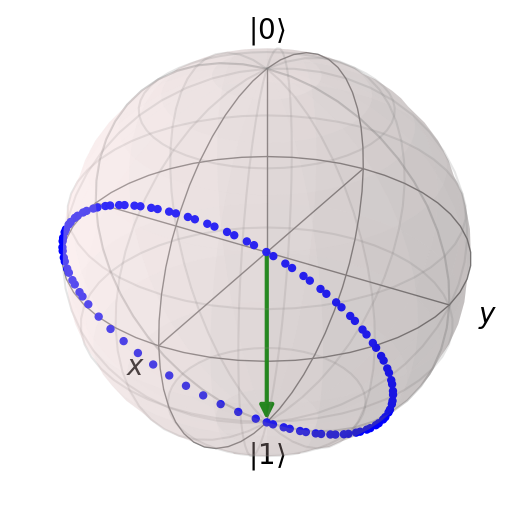

In [12]:
b3 = Bloch()
b3.make_sphere()
#We are going to add the vector that represents the initial state and the points that correspond to the evolution
b3.add_vectors(sigma03) #Initial state
pnts = [sigmax, sigmay,sigmaz]
b3.add_points(pnts)
b3.render()
b3.show()

# Case 3: Effect of decoherence:

In [13]:
# Use ODEINT to solve the differential equations defined by the optical Bloch equations
from scipy.integrate import odeint

# Parameter values
# Rabi frequency:
om4=1
# Detuning
delt4=0
# Transverse decay rate
dec4 = 0.3
# Longitudinal decay rate
rel4=0

# Initial conditions
sigmax4=0
sigmay4=0
sigmaz4=-1

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 20.0
numpoints = 100

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p4 = [om4,delt4,rel4,dec4]
sigma04 = [sigmax4, sigmay4,sigmaz4]

# Call the ODE solver.
bloch_sol4 = odeint(optical_bloch, sigma04, t, args=(p4,),
              atol=abserr, rtol=relerr)

with open('decoherence_effect.dat', 'w') as f4:
    # Print & save the solution.
    for t1, sigma4 in zip(t, bloch_sol4):
        print(t1, sigma4[0], sigma4[1], sigma4[2],file=f4);

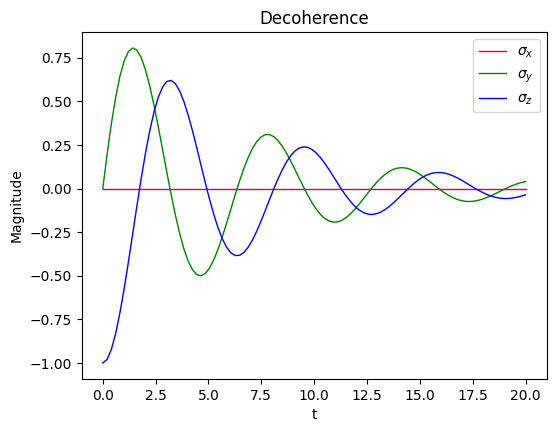

<Figure size 640x480 with 0 Axes>

In [14]:
# Plot the solution that was generated
t, sigmax, sigmay,sigmaz = loadtxt('decoherence_effect.dat', unpack=True)

figure(1, figsize=(6, 4.5))

# Plotting the curves simultaneously 
lw = 1
plt.plot(t, sigmax, color='r', label=r'$\sigma_x$', linewidth=lw) 
plt.plot(t, sigmay, color='g', label=r'$\sigma_y$', linewidth=lw) 
plt.plot(t, sigmaz, color='b', label=r'$\sigma_z$', linewidth=lw) 

# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("t") 
plt.ylabel("Magnitude") 
plt.title("Decoherence") 


# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
  
# To load the display window 
plt.show()

plt.savefig('decoherence_effect_components.png', dpi=100)

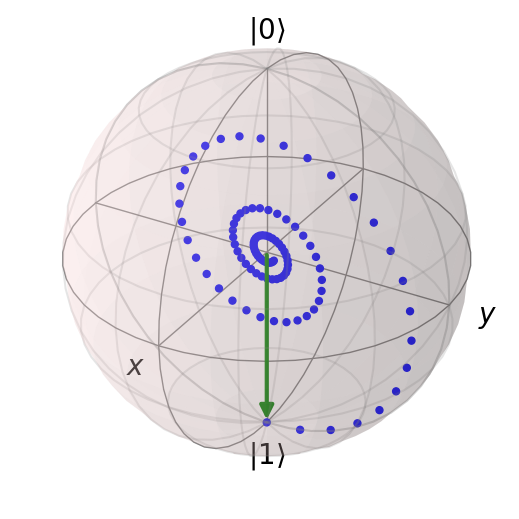

In [15]:
b4 = Bloch()
b4.make_sphere()
#We are going to add the vector that represents the initial state and the points that correspond to the evolution
b4.add_vectors(sigma04) #Initial state
pnts = [sigmax, sigmay,sigmaz]
b4.add_points(pnts)
b4.render()
b4.show()

# Case 4: Effect of relaxation:

### a) Hypothetical case: Relaxation without decoherence (no physical meaning).

In [16]:
# Use ODEINT to solve the differential equations defined by the optical Bloch equations
from scipy.integrate import odeint

# Parameter values
# Rabi frequency:
om5=1
# Detuning
delt5=0
# Transverse decay rate
dec5 = 0
# Longitudinal decay rate
rel5=1

# Initial conditions
sigmax5=0
sigmay5=0
sigmaz5=-1

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 100

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p5 = [om5,delt5,rel5,dec5]
sigma05 = [sigmax5, sigmay5,sigmaz5]

# Call the ODE solver.
bloch_sol5 = odeint(optical_bloch, sigma05, t, args=(p5,),
              atol=abserr, rtol=relerr)

with open('relaxation_effect.dat', 'w') as f5:
    # Print & save the solution.
    for t1, sigma5 in zip(t, bloch_sol5):
        print(t1, sigma5[0], sigma5[1], sigma5[2],file=f5);

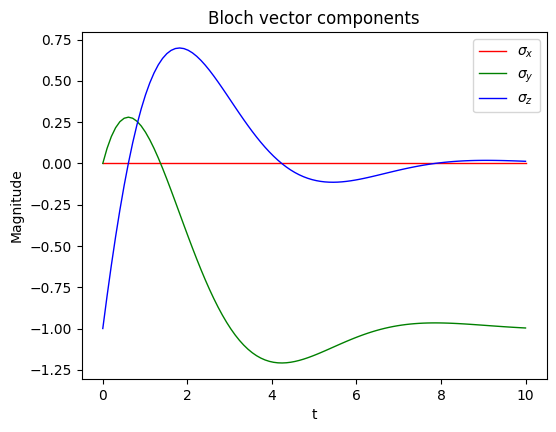

<Figure size 640x480 with 0 Axes>

In [17]:
# Plot the solution that was generated
t, sigmax, sigmay,sigmaz = loadtxt('relaxation_effect.dat', unpack=True)

figure(1, figsize=(6, 4.5))

# Plotting the curves simultaneously 
lw = 1
plt.plot(t, sigmax, color='r', label=r'$\sigma_x$', linewidth=lw) 
plt.plot(t, sigmay, color='g', label=r'$\sigma_y$', linewidth=lw) 
plt.plot(t, sigmaz, color='b', label=r'$\sigma_z$', linewidth=lw) 

# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("t") 
plt.ylabel("Magnitude") 
plt.title("Bloch vector components") 


# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
  
# To load the display window 
plt.show()

plt.savefig('relaxation_effect_components.png', dpi=100)

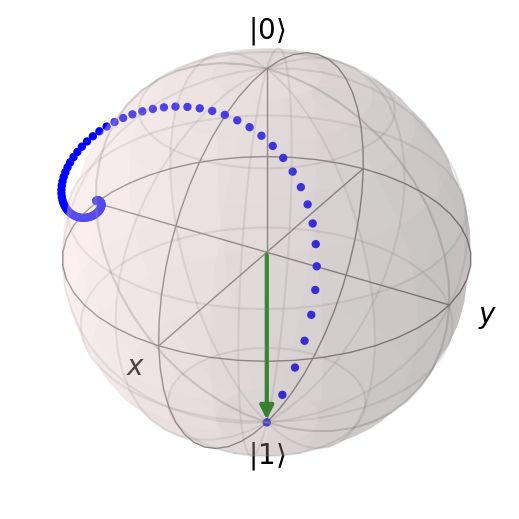

In [18]:
b5 = Bloch()
b5.make_sphere()
#We are going to add the vector that represents the initial state and the points that correspond to the evolution
b5.add_vectors(sigma05) #Initial state
pnts = [sigmax, sigmay,sigmaz]
b5.add_points(pnts)
b5.render()
b5.show()

This case is not valid because we obtain non-normalized state vectors, hence they don't have a physical meaning.

### b) Relaxation and coherence (pure case of homogeneous broadening $ \gamma=\Gamma/2 $)

In [19]:
# Use ODEINT to solve the differential equations defined by the optical Bloch equations
from scipy.integrate import odeint

# Parameter values
# Rabi frequency:
om6=1
# Detuning
delt6=0
# Transverse decay rate
dec6 = 0.1
# Longitudinal decay rate
rel6=0.2

# Initial conditions
sigmax6=0
sigmay6=0
sigmaz6=1

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 20.0
numpoints = 100

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p6 = [om6,delt6,rel6,dec6]
sigma06 = [sigmax6, sigmay6,sigmaz6]

# Call the ODE solver.
bloch_sol6 = odeint(optical_bloch, sigma06, t, args=(p6,),
              atol=abserr, rtol=relerr)

with open('relaxation_decoherence1_effect.dat', 'w') as f6:
    # Print & save the solution.
    for t1, sigma6 in zip(t, bloch_sol6):
        print(t1, sigma6[0], sigma6[1], sigma6[2],file=f6);

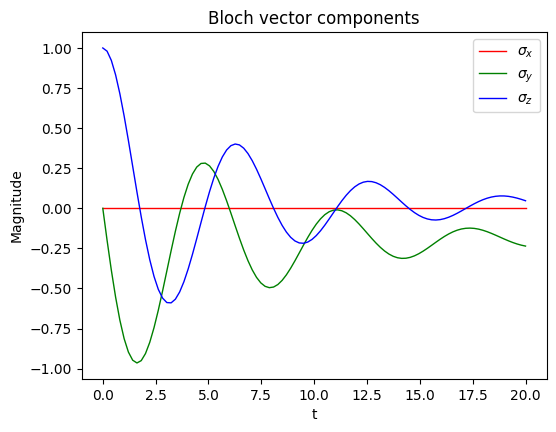

<Figure size 640x480 with 0 Axes>

In [20]:
# Plot the solution that was generated
t, sigmax, sigmay,sigmaz = loadtxt('relaxation_decoherence1_effect.dat', unpack=True)

figure(1, figsize=(6, 4.5))

# Plotting the curves simultaneously 
lw = 1
plt.plot(t, sigmax, color='r', label=r'$\sigma_x$', linewidth=lw) 
plt.plot(t, sigmay, color='g', label=r'$\sigma_y$', linewidth=lw) 
plt.plot(t, sigmaz, color='b', label=r'$\sigma_z$', linewidth=lw) 

# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("t") 
plt.ylabel("Magnitude") 
plt.title("Bloch vector components") 


# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
  
# To load the display window 
plt.show()

plt.savefig('relaxation_decoherence1_effect_components.png', dpi=100)

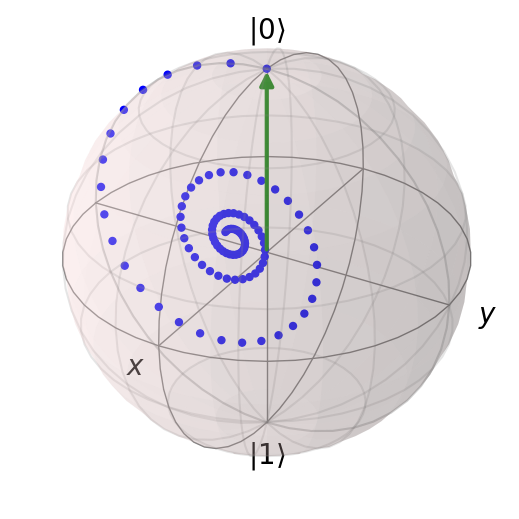

In [21]:
b6 = Bloch()
b6.make_sphere()
#We are going to add the vector that represents the initial state and the points that correspond to the evolution
b6.add_vectors(sigma06) #Initial state
pnts = [sigmax, sigmay,sigmaz]
b6.add_points(pnts)
b6.render()
b6.show()

### c) Relaxation and coherence ( $ \gamma>\Gamma/2 $)

In [22]:
# Use ODEINT to solve the differential equations defined by the optical Bloch equations
from scipy.integrate import odeint

# Parameter values
# Rabi frequency:
om7=1
# Detuning
delt7=0
# Transverse decay rate
dec7 = 0.3
# Longitudinal decay rate
rel7=0.01

# Initial conditions
sigmax7=0
sigmay7=0
sigmaz7=-1

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 20.0
numpoints = 100

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p7 = [om7,delt7,rel7,dec7]
sigma07 = [sigmax7, sigmay7,sigmaz7]

# Call the ODE solver.
bloch_sol7 = odeint(optical_bloch, sigma07, t, args=(p7,),
              atol=abserr, rtol=relerr)

with open('relaxation_decoherence2_effect.dat', 'w') as f7:
    # Print & save the solution.
    for t1, sigma7 in zip(t, bloch_sol7):
        print(t1, sigma7[0], sigma7[1], sigma7[2],file=f7);

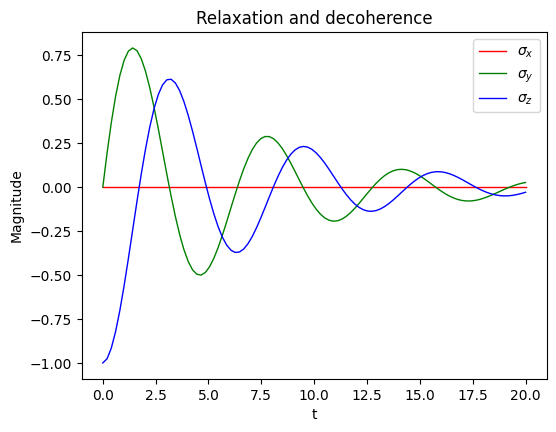

<Figure size 640x480 with 0 Axes>

In [23]:
# Plot the solution that was generated
t, sigmax, sigmay,sigmaz = loadtxt('relaxation_decoherence2_effect.dat', unpack=True)

figure(1, figsize=(6, 4.5))

# Plotting the curves simultaneously 
lw = 1
plt.plot(t, sigmax, color='r', label=r'$\sigma_x$', linewidth=lw) 
plt.plot(t, sigmay, color='g', label=r'$\sigma_y$', linewidth=lw) 
plt.plot(t, sigmaz, color='b', label=r'$\sigma_z$', linewidth=lw) 

# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("t") 
plt.ylabel("Magnitude") 
plt.title("Relaxation and decoherence") 


# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
  
# To load the display window 
plt.show()

plt.savefig('relaxation_decoherence2_effect_components.png', dpi=100)

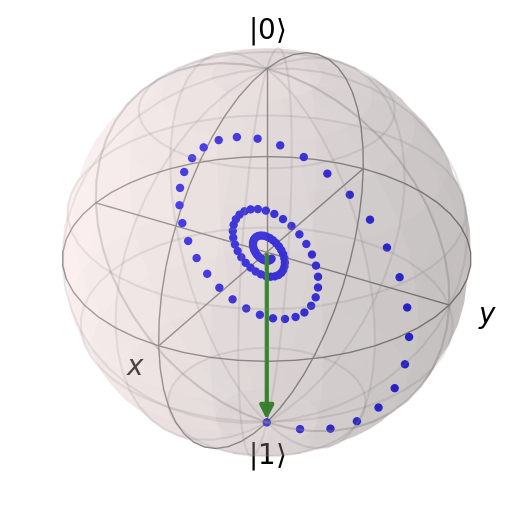

In [24]:
b7 = Bloch()
b7.make_sphere()
#We are going to add the vector that represents the initial state and the points that correspond to the evolution
b7.add_vectors(sigma07) #Initial state
pnts = [sigmax, sigmay,sigmaz]
b7.add_points(pnts)
b7.render()
b7.show()